In [1]:
#import necessary librabry
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
pip install flask ngrok

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [7]:
!unzip /content/drive/MyDrive/cardectiondata.zip

unzip:  cannot find or open /content/drive/MyDrive/cardectiondata.zip, /content/drive/MyDrive/cardectiondata.zip.zip or /content/drive/MyDrive/cardectiondata.zip.ZIP.


In [8]:
#defining the base, train and validation directory path
base_dir = '/content/drive/MyDrive/data1a'
train_dir = os.path.join(base_dir, 'training')
validation_dir = os.path.join(base_dir, 'validation')

In [9]:
#defining the damage and whole , train nand validation directory
train_damage_dir = os.path.join(train_dir, '00-damage')
train_whole_dir = os.path.join(train_dir, '01-whole')
validation_damage_dir = os.path.join(validation_dir, '00-damage')
validation_whole_dir = os.path.join(validation_dir, '01-whole')

In [10]:
#data augmentation
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [11]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  
        target_size=(150, 150), 
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 938 images belonging to 2 classes.
Found 2 images belonging to 2 classes.


In [12]:
#defining model
from tensorflow.keras import Model 
from tensorflow.keras.applications import DenseNet121   

base_model = DenseNet121(input_shape = (150, 150, 3),  include_top = False, weights = 'imagenet') 

x=   tf.keras.layers.Flatten()(base_model.output)
x=   tf.keras.layers.Dense(512, activation='relu')(x) 
x=   tf.keras.layers.Dense(1, activation='sigmoid')(x) 

model= Model( base_model.input, x)

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['Accuracy','Precision','Recall'])

#training the model
history = model.fit(
      train_generator,
      epochs=15,
      validation_data=validation_generator,
      verbose=2)

29097984/29084464 [==============================] - 1s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/15
47/47 - 66s - loss: 0.1594 - Accuracy: 0.9776 - precision: 0.9818 - recall: 0.9957 - val_loss: 3.5509e-22 - val_Accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000 - 66s/epoch - 1s/step
Epoch 2/15
47/47 - 10s - loss: 0.0052 - Accuracy: 0.9989 - precision: 0.9989 - recall: 1.0000 - val_loss: 2.2083e-20 - val_Accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000 - 10s/epoch - 203ms/step
Epoch 3/15
47/47 - 9s - loss: 0.0217 - Accuracy: 0.9979 - precision: 0.9989 - recall: 0.9989 - val_loss: 2.2851e-18 - val_Accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000 - 9s/epoch - 202ms/step
Epoch 4/15
47/47 - 10s - loss: 7.3081e-05 - Accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 7.0054e-20 - val_Accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000 - 10s/epoch - 204ms/step
Epoch 5/15
47/47 - 9s - loss: 7.2749e-06 - Accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 4.6928e-21 - val_Accuracy: 1.0000 - val_precision: 1

In [13]:
#weights saving
model.save("classifier.h5")

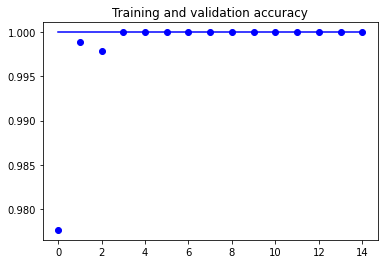

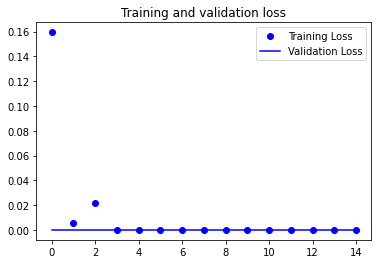

In [14]:
import matplotlib.pyplot as plt
acc = history.history['Accuracy']
val_acc = history.history['val_Accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

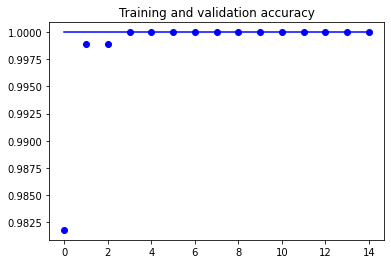

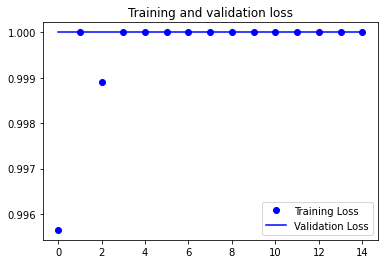

In [15]:
import matplotlib.pyplot as plt
acc = history.history['precision']
val_acc = history.history['val_precision']
loss = history.history['recall']
val_loss = history.history['val_recall']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

The car is not damaged


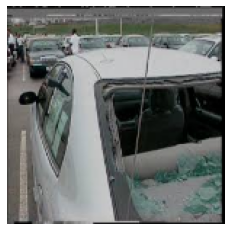

In [18]:
import cv2
im = cv2.imread("/content/drive/MyDrive/data1a/validation/00-damage/0021.JPEG")
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
im = cv2.resize(im, (150, 150)) 
imS=im.reshape([1,150,150,3])
pred=model.predict(np.array(imS))
if pred[0][0] == 0:
    print("The car is damaged")
else:
    print("The car is not damaged")
plt.axis("off")
plt.imshow(im)

[[1.]]
The car is damaged


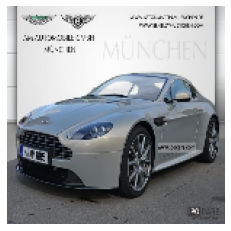

In [19]:
im = cv2.imread("/content/drive/MyDrive/data1a/validation/01-whole/0013.jpg")
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
im = cv2.resize(im, (150, 150)) 
imS=im.reshape([1,150,150,3])
pred=model.predict(np.array(imS))
print(pred)
if pred[0][0] > 0:
    print("The car is damaged")
else:
    print("The car is not damaged")
plt.axis("off")
plt.imshow(im)